## SALES PREDICTION USING PYTHON


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [1]:
from google.colab import files


uploaded = files.upload()


Saving advertising.csv to advertising.csv


In [3]:
df=pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.shape

(200, 4)

In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


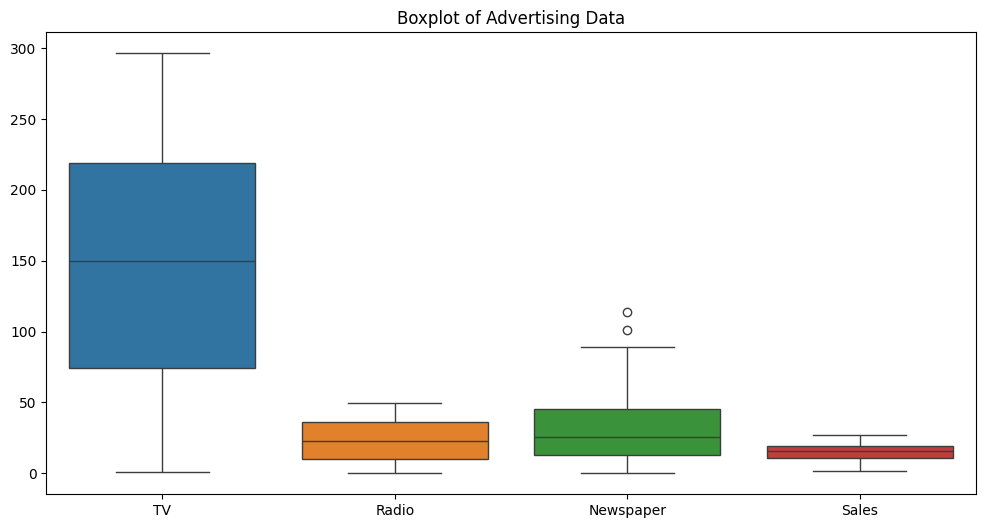

In [6]:
# Check for outliers using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Advertising Data')
plt.show()

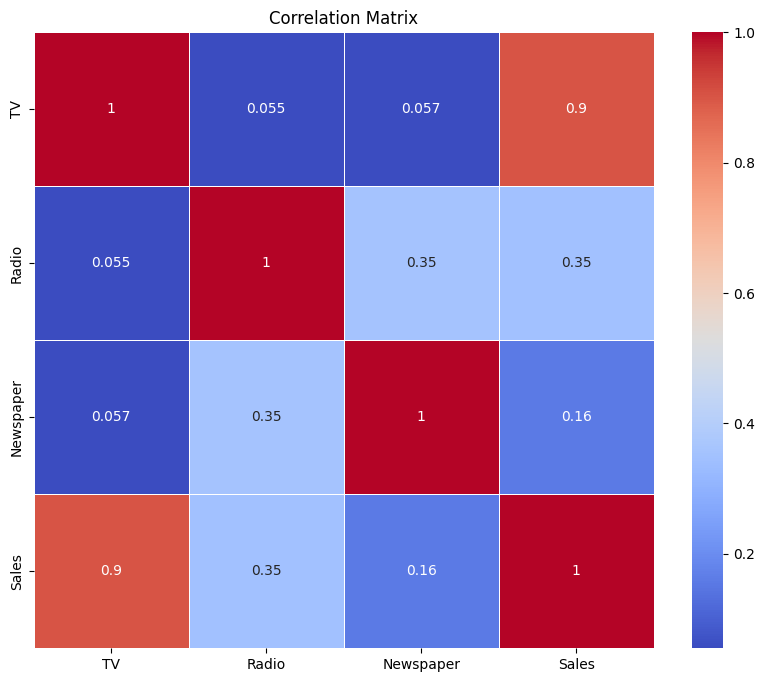

In [7]:
# Check for correlations between variables
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


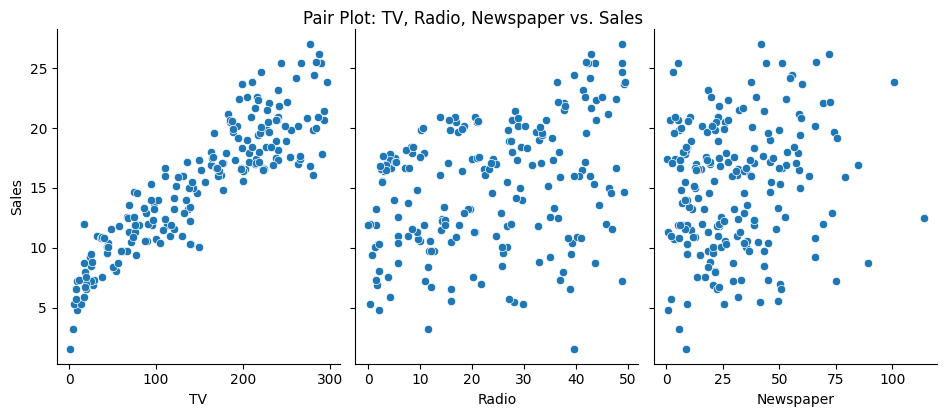

In [8]:


sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=0.8, kind='scatter')
plt.suptitle('Pair Plot: TV, Radio, Newspaper vs. Sales', y=1.02)
plt.show()


## Train the model

In [9]:
df.dropna(inplace=True)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [11]:


# Split the data into features (X) and target variable (y)
X = df.drop('Sales', axis=1)
y = df['Sales']

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a Model
model = LinearRegression()



In [15]:
# Train the Model
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Evaluate the Model
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2.9077569102710896
R-squared: 0.9059011844150826


* **Mean Squared Error (MSE):** This metric measures the average squared difference between the predicted values and the actual values. A lower MSE indicates better model performance. In this case, having a low MSE (2.9) suggests that the model's predictions are close to the actual values on average.

* **R-squared (R²):** R-squared is a measure of how well the model explains the variance in the target variable. It ranges from 0 to 1, where 1 indicates a perfect fit. In this case, an R² of 0.905 suggests that approximately 90.6% of the variability in the target variable (Sales) has been explained by our model.


In [17]:
print(y_pred)


[17.0347724  20.40974033 23.72398873  9.27278518 21.68271879 12.56940161
 21.08119452  8.69035045 17.23701254 16.66657475  8.92396497  8.4817344
 18.2075123   8.06750728 12.64550975 14.93162809  8.12814594 17.89876565
 11.00880637 20.47832788 20.80631846 12.59883297 10.9051829  22.38854775
  9.41796094  7.92506736 20.83908497 13.81520938 10.77080925  7.92682509
 15.95947357 10.63490851 20.80292008 10.43434164 21.5784752  21.18364487
 12.12821771 22.80953262 12.60992766  6.46441252]


In [18]:
print(y_test)

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    16.5
45     16.1
66     11.0
182     8.7
165    16.9
78      5.3
186    10.3
177    16.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65     11.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      15.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: Sales, dtype: float64


In [19]:
model.coef_

array([0.05450927, 0.10094536, 0.00433665])

In [20]:
model.intercept_

4.714126402214127

In [24]:
# Import necessary modules
import numpy as np
from sklearn.linear_model import LinearRegression

# Given values
intercept = 4.714126402214127
coef = [0.05450927, 0.10094536, 0.00433665]
new_input = [[230.1,	37.8,	69.2]]

# Convert the coefficient list to a NumPy array
coef = np.array(coef)

# Create a linear regression model
model = LinearRegression()
model.intercept_ = intercept
model.coef_ = coef

# Predict the output variable
output_variable = model.predict(new_input)

# Print the result
print("Output Variable:", output_variable[0])

Output Variable: 21.372540217214127


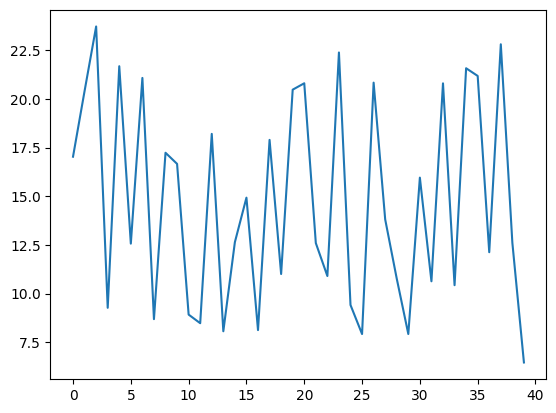

In [25]:
plt.plot(y_pred)

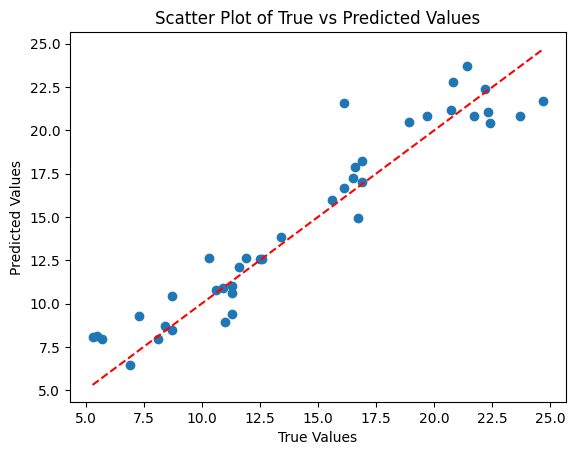

In [35]:

import matplotlib.pyplot as plt
import numpy as np



modelcoef = np.array([0.05450927, 0.10094536, 0.00433665])

# Calculate the predicted values for the regression line
y_pred = 4.714126402214127 + np.dot(X_test, modelcoef)

# Scatter plot of the true values
plt.scatter(y_test, y_pred)

# Plot the diagonal line (y=x) for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')

# Labeling axes and title
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of True vs Predicted Values')

# Show the plot
plt.show()
